In [1]:
import matplotlib
import numpy as np
import os
import sys
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob
from pprint import pprint
from tqdm import tqdm
import galsim
from copy import deepcopy

# set paths to various directories based on the machine this code is being executed on
try:
    with initialize(version_base=None, config_path='config'):
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']
except:
    with initialize(version_base=None, config_path='../../config'):
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.instruments.roman import Roman
from mejiro.synthetic_image import SyntheticImage
from mejiro.exposure import Exposure
from mejiro.lenses.test import SampleStrongLens

In [2]:
roman = Roman()
lens = SampleStrongLens()
band = 'F129'
scene_size = 5  # arcsec
oversample = 1
exposure_time = 146

synthetic_image = SyntheticImage(strong_lens=lens,
                                 instrument=roman,
                                 band=band,
                                 arcsec=scene_size,
                                 oversample=oversample,
                                 verbose=False)

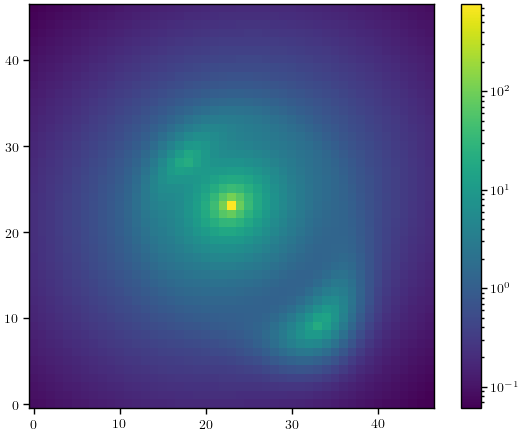

In [3]:
plt.imshow(synthetic_image.image, norm=colors.LogNorm())
plt.colorbar()
plt.show()

In [4]:
engine_params = {
    'sky_background': False,
    'detector_effects': False
}

exposure = Exposure(synthetic_image,
                    exposure_time=exposure_time,
                    engine_params=engine_params,
                    check_cache=True,
                    psf_cache_dir='/grad/bwedig/mejiro/tests/test_data',
                    verbose=False)

In [5]:
np.argwhere(exposure.exposure < 0)

array([[ 1, 22],
       [ 3, 22],
       [ 5, 22],
       [22,  1],
       [22,  3],
       [22,  5],
       [22, 39],
       [22, 41],
       [22, 43],
       [39, 22],
       [41, 22],
       [43, 22]])

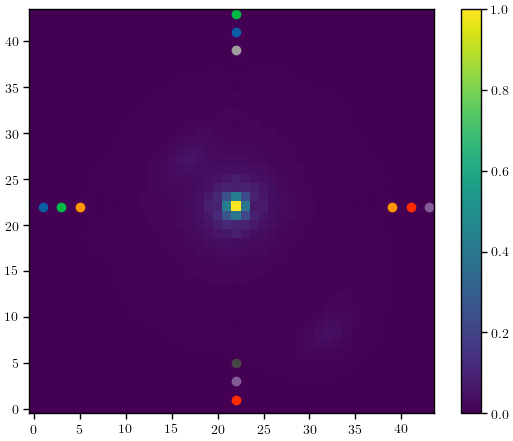

In [6]:
plt.imshow(exposure.exposure)
for x, y in np.argwhere(exposure.exposure < 0):
    plt.scatter(x, y)
plt.colorbar()
plt.show()